In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
data = pd.read_csv('911.csv')

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Removal of null values from dataset

In [5]:
data =data.dropna()

In [6]:
data['title'].nunique()

137

In [7]:
def call_type(x):
    if (('EMS' in x)==True):
        return 'EMS'
    elif (('Fire' in x)==True):
        return 'Fire'
    elif (('Traffic' in x)==True):
        return 'Traffic'

In [8]:
data['call_type'] = data['title'].apply(call_type)

In [9]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic


In [10]:
data['call_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

## Different types of calls

In [11]:
# sns.set()

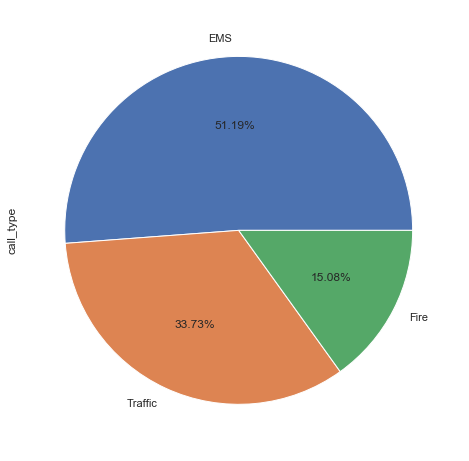

In [12]:
# plt.pie(data['call_type'].value_counts(),labels=['EMS','Fire','Traffic'])
sns.set(rc={'figure.figsize':(18, 8)})
data['call_type'].value_counts().plot.pie(autopct='%.2f%%')
plt.savefig('Call_types.png')

In [13]:
data['call_type'].value_counts()

EMS        190284
Traffic    125370
Fire        56057
Name: call_type, dtype: int64

## timeStamp converted to dateTime

In [14]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

## Date Extract

In [15]:
def date_extract(x):
    year = x.year
#     print(year)
    month = x.month
#     print(month)
    day = x.day
#     print(day)
    new_date = str(year)+'-'+str(month)+'-'+str(day)
    return new_date

In [16]:
data['date'] = data['timeStamp'].apply(date_extract)

In [17]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10


## Time Extract

In [18]:
def time_extract(x):
    hour = x.hour
#     print(hour)
    minute = x.minute
#     print(minute)
    sec = x.second
#     print(sec)
    new_time = str(hour)+':'+str(minute)+':'+str(sec)
    return new_time
    

In [19]:
data['time'] = data['timeStamp'].apply(time_extract)

In [20]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date,time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,14:39:21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,16:47:36
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10,15:39:4


In [21]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -             83268
Traffic: DISABLED VEHICLE -             24819
Fire: FIRE ALARM                        22998
EMS: FALL VICTIM                        20029
EMS: RESPIRATORY EMERGENCY              20026
EMS: CARDIAC EMERGENCY                  19315
Traffic: ROAD OBSTRUCTION -             11321
EMS: SUBJECT IN PAIN                    11312
EMS: HEAD INJURY                        10548
EMS: VEHICLE ACCIDENT                   10461
EMS: GENERAL WEAKNESS                    6662
EMS: SYNCOPAL EPISODE                    6632
EMS: SEIZURES                            6487
EMS: UNKNOWN MEDICAL EMERGENCY           6425
EMS: ALTERED MENTAL STATUS               5839
EMS: MEDICAL ALERT ALARM                 5721
Fire: FIRE INVESTIGATION                 5633
EMS: ABDOMINAL PAINS                     5468
EMS: UNCONSCIOUS SUBJECT                 5009
EMS: HEMORRHAGING                        4957
EMS: CVA/STROKE                          4925
EMS: OVERDOSE                     

## Year , Month , day

In [22]:
import calendar
def year_extract(x):
    year = x.year
    return year
def month_extract(x):
    month_num = x.month
    monthname = calendar.month_name[month_num]
    return monthname
# def day_extract(x):
#     day = x.day
#     return day

In [23]:
data['year'] = data['timeStamp'].apply(year_extract)
data['month'] = data['timeStamp'].apply(month_extract)
# data['day'] = data['timeStamp'].apply(day_extract)

In [24]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date,time,year,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,2015,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21,2015,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,14:39:21,2015,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,16:47:36,2015,December
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10,15:39:4,2015,December


## Yearly Distrubution of different calls

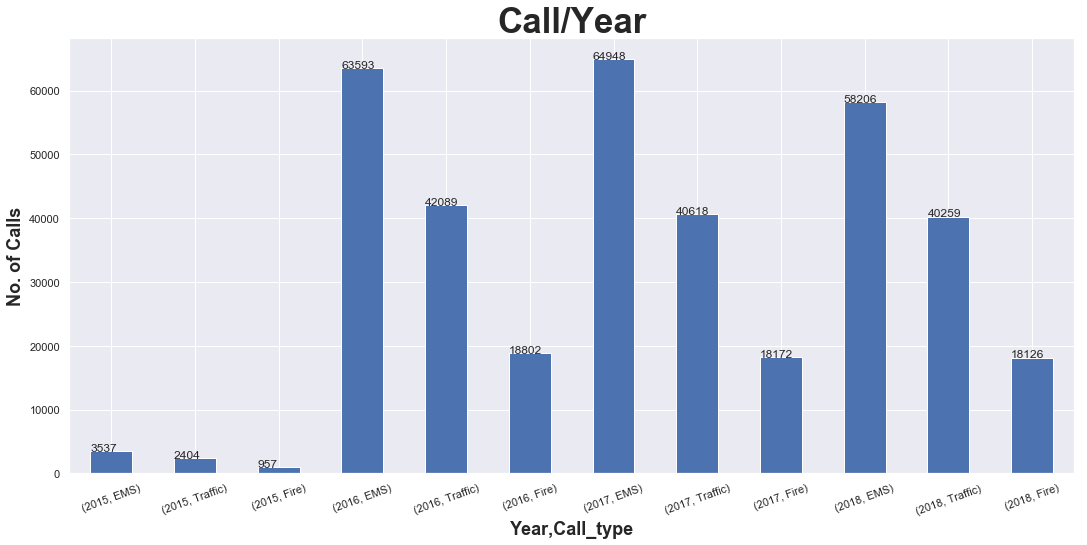

In [25]:
sns.set(rc={'figure.figsize':(18, 8)})
plot_data = data.groupby('year')['call_type'].value_counts().plot(kind='bar')
for p in plot_data.patches:
    plot_data.annotate(str(p.get_height()), xy = (p.get_x(), p.get_height()))

plt.title('Call/Year',fontsize=35,weight='bold')
plt.xticks(rotation=20)
plt.xlabel('Year,Call_type',fontsize=18,weight='bold')
plt.ylabel('No. of Calls',fontsize=18,weight='bold')
plt.savefig('Call_per_Year.png')

## Monthly Distribution of different call type

In [26]:
month_data = data.groupby('month')['call_type'].value_counts()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_data = month_data.reindex(month_order,level=0)
month_data = month_data.reindex(['EMS','Traffic','Fire'],level=1)
month_data.head()

month     call_type
January   EMS          16966
          Traffic      11511
          Fire          4996
February  EMS          15176
          Traffic       9465
Name: call_type, dtype: int64

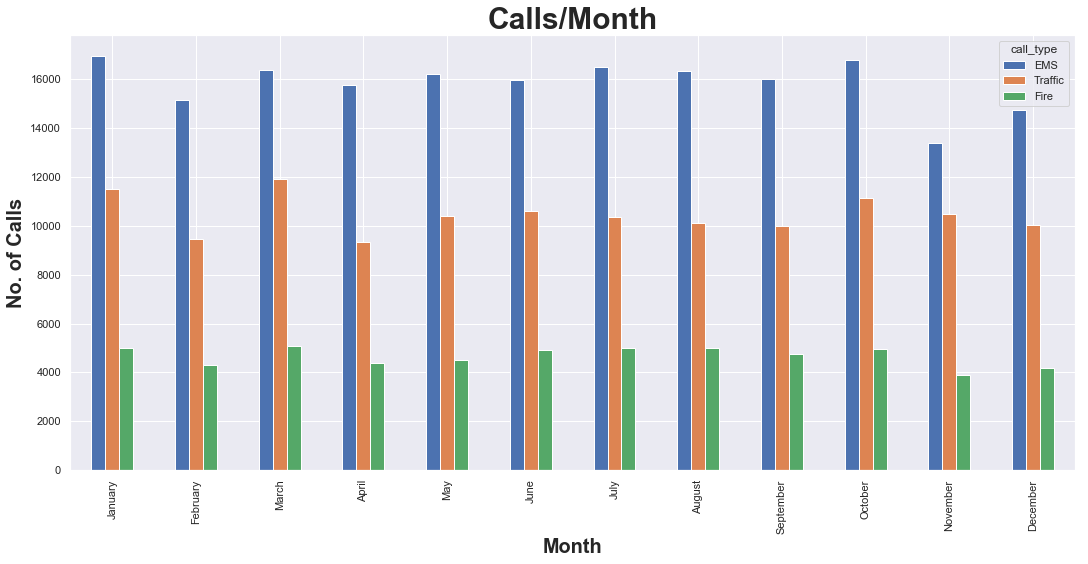

In [27]:
# fig = plt.figure(figsize=(20,4))
sns.set(rc={'figure.figsize':(18, 8)})
month_data.unstack().plot(kind='bar')
plt.title('Calls/Month',fontsize=30,weight='bold')
plt.xlabel('Month',fontsize = 20,weight='bold')
plt.ylabel('No. of Calls',fontsize = 20,weight='bold')
plt.savefig('Calls_per_month.png',bbox_inches='tight')

## Hourly Distribution of Call 

In [28]:
def get_hour(x):
    hour = x.hour
    return hour

In [29]:
data['hour'] = data['timeStamp'].apply(get_hour)

In [30]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date,time,year,month,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,2015,December,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21,2015,December,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,14:39:21,2015,December,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,16:47:36,2015,December,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10,15:39:4,2015,December,15


In [31]:
# data.groupby(['hour'])['call_type'].value_counts()
hourly_distribution = data.groupby(['hour','call_type'])['call_type'].count()

In [32]:
hourly_distribution.head()

hour  call_type
0     EMS          4888
      Fire         1199
      Traffic      1564
1     EMS          4396
      Fire          979
Name: call_type, dtype: int64

In [33]:
hourly_distribution = hourly_distribution.reindex(['EMS','Traffic','Fire'],level=1)

In [34]:
hourly_distribution.head()

hour  call_type
0     EMS          4888
      Traffic      1564
      Fire         1199
1     EMS          4396
      Traffic      1220
Name: call_type, dtype: int64

In [35]:
hourly_distribution.index
#multi index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], ['EMS', 'Traffic', 'Fire']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['hour', 'call_type'])

In [36]:
x=hourly_distribution.unstack().head()
#series to dataframe ( unstack())

In [37]:
x.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='hour')

In [38]:
font={
    'size':'30',
    'weight':'bold'
}

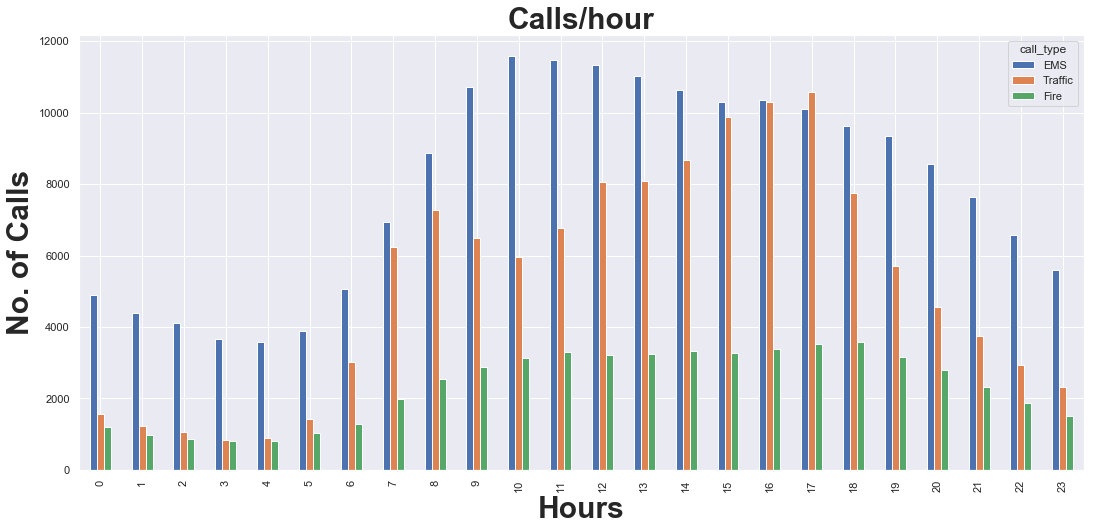

In [39]:
# plt.figure(figsize=(40,6))
sns.set(rc={'figure.figsize':(18, 8)})
hourly_distribution.unstack().plot.bar()
plt.ylabel('No. of Calls',fontdict=font)
plt.xlabel('Hours',fontdict=font)
plt.title('Calls/hour',fontdict=font)
plt.savefig('Calls_per_hours.png')

## percentage calls per hour

In [40]:
hour_percentage = hourly_distribution.groupby(level=0).apply(lambda x : x*100/(x.sum()))
hour_percentage.head()

hour  call_type
0     EMS          63.887074
      Traffic      20.441772
      Fire         15.671154
1     EMS          66.656558
      Traffic      18.498863
Name: call_type, dtype: float64

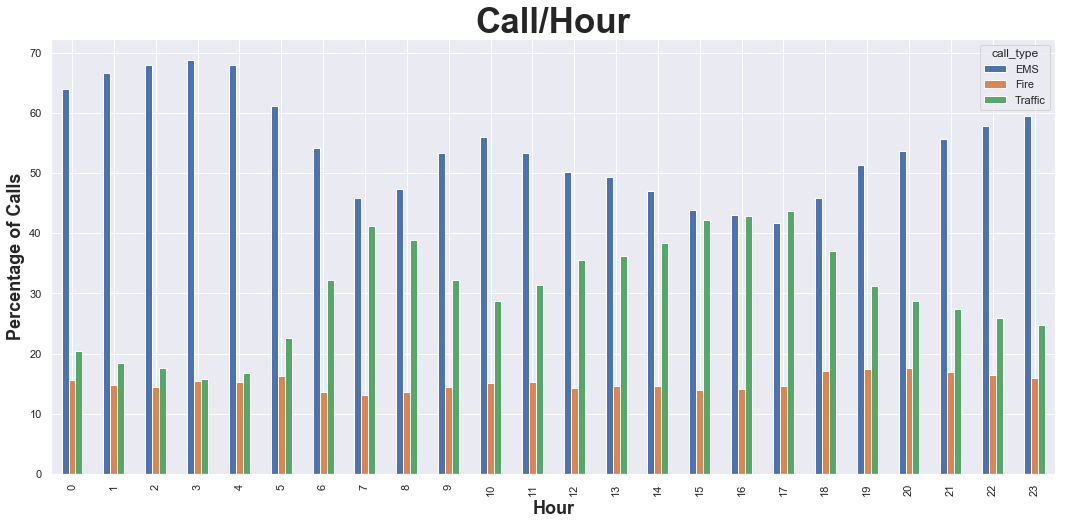

In [41]:
hour_percentage.unstack().plot(kind='bar')
plt.title('Call/Hour',fontsize = 35,weight='bold')
plt.ylabel('Percentage of Calls',fontsize =18,weight='bold')
plt.xlabel('Hour',fontsize =18,weight='bold')
plt.savefig('percentage_calperhour.png')

## Different Emergency Types 

In [42]:
def emergency_types(x):
    x = x.split(':')
    x=x[1]
    return(x)

In [43]:
data['Emergency_types'] = data['title'].apply(emergency_types)

In [44]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date,time,year,month,hour,Emergency_types
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,2015,December,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21,2015,December,17,DIABETIC EMERGENCY


In [45]:
data['Emergency_types'].nunique()

91

In [46]:
emergency_data = data.groupby('Emergency_types')['call_type'].value_counts()

In [47]:
emergency_top = emergency_data.sort_values(ascending=False)

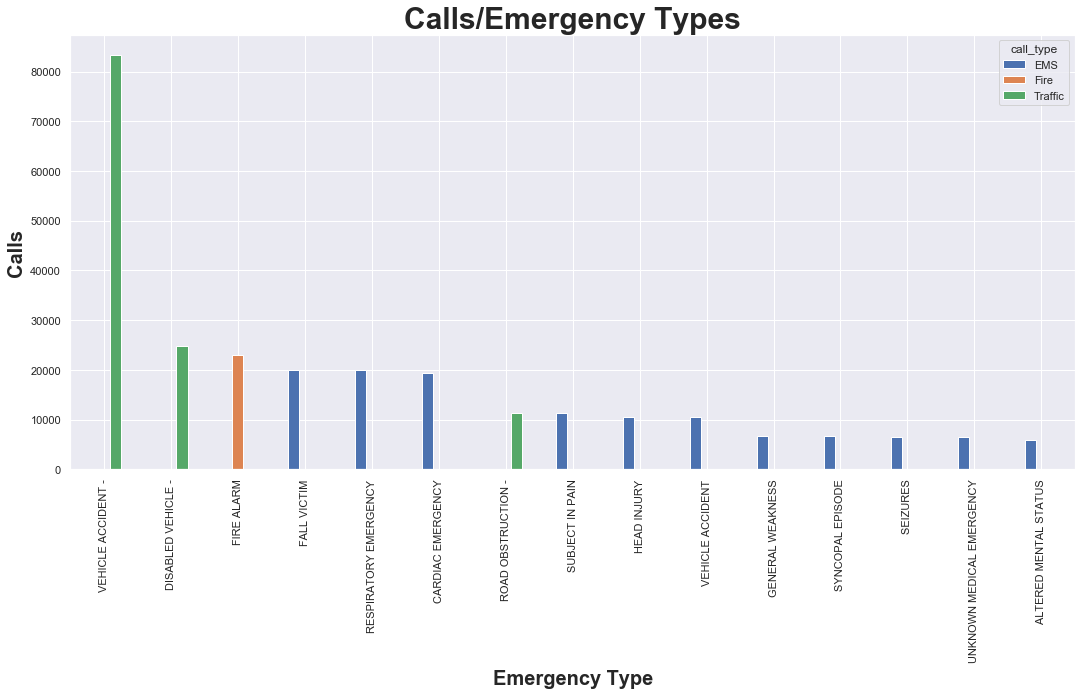

In [48]:
emergency_top.head(15).unstack().plot(kind='bar')
plt.title('Calls/Emergency Types',fontdict=font)
plt.xlabel('Emergency Type',fontsize = 20,weight='bold')
plt.ylabel('Calls',fontsize = 20,weight='bold')
plt.savefig('Calls_per_EmergencyTypes.png',bbox_inches='tight')

## EMS calls per Emergency Types

In [49]:
ems_emer_data = data.groupby(['Emergency_types'])['call_type'].value_counts()
# ems_emer_data[ems_emer_data['call_type']=='EMS']
ems_emer_data = ems_emer_data.unstack()
ems_emer_top = ems_emer_data['EMS'].sort_values(ascending =False)
ems_emer_top = ems_emer_top.head(20)

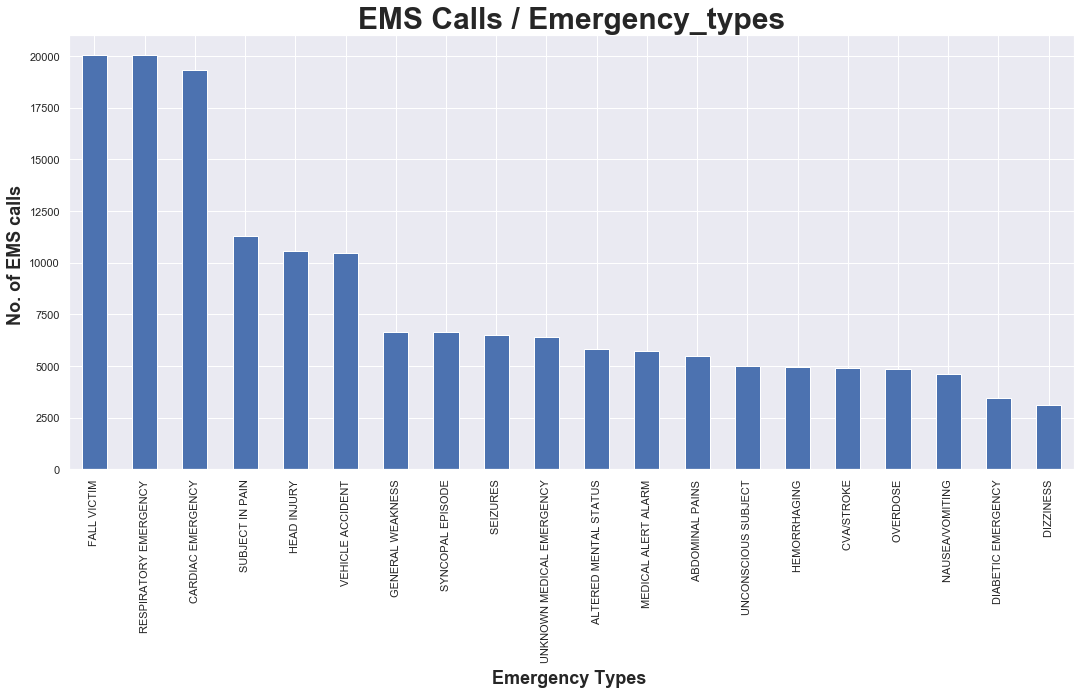

In [50]:
ems_emer_top.plot(kind='bar')
plt.title('EMS Calls / Emergency_types',fontdict=font)
plt.xlabel('Emergency Types ',fontsize = 18,weight = 'bold')
plt.ylabel('No. of EMS calls ',fontsize = 18,weight = 'bold')
plt.savefig('EMSCalls_per_EmergencyTypes.png',bbox_inches='tight')

## Traffic calls per emergency types

In [51]:
traffic_emer_data = data.groupby(['Emergency_types'])['call_type'].value_counts()
traffic_emer_data = traffic_emer_data.unstack()
traffic_emer_top = traffic_emer_data['Traffic'].sort_values(ascending =False)
traffic_emer_top = traffic_emer_top.head(10)

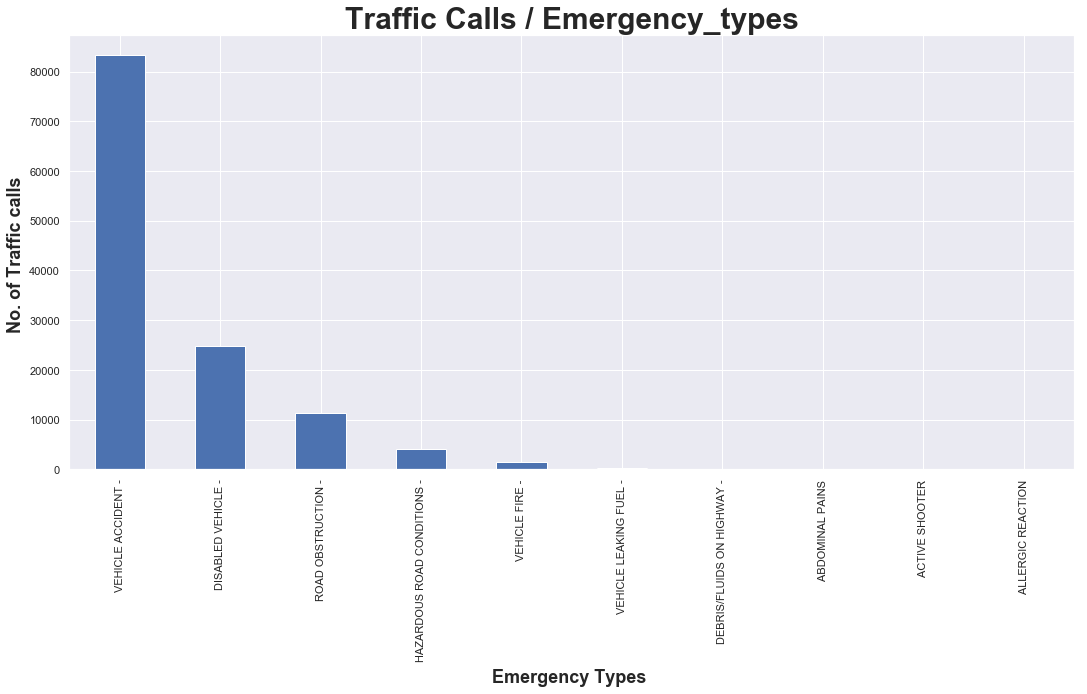

In [52]:
traffic_emer_top.plot(kind='bar')
plt.title('Traffic Calls / Emergency_types',fontdict=font)
plt.xlabel('Emergency Types ',fontsize = 18,weight = 'bold')
plt.ylabel('No. of Traffic calls ',fontsize = 18,weight = 'bold')
plt.savefig('Traffic_Calls_per_EmergencyTypes.png',bbox_inches='tight')

## Fire calls per emergency type

In [53]:
fire_emer_data = data.groupby(['Emergency_types'])['call_type'].value_counts()
fire_emer_data = fire_emer_data.unstack()
fire_emer_top = fire_emer_data['Fire'].sort_values(ascending =False)
fire_emer_top = fire_emer_top.head(15)

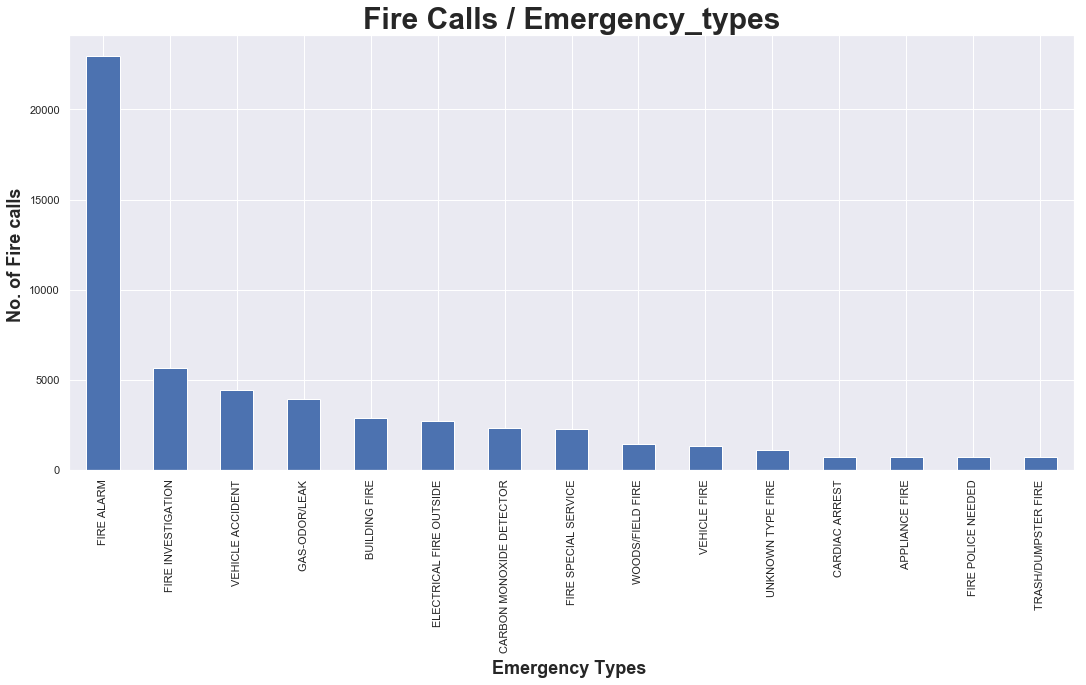

In [54]:
fire_emer_top.plot(kind='bar')
plt.title('Fire Calls / Emergency_types',fontdict=font)
plt.xlabel('Emergency Types ',fontsize = 18,weight = 'bold')
plt.ylabel('No. of Fire calls ',fontsize = 18,weight = 'bold')
plt.savefig('FIre_Calls_per_EmergencyTypes.png',bbox_inches='tight')

## calls per Day

In [55]:
# import datetime as dt

In [56]:
data['day'] = data['timeStamp'].dt.day_name()

In [57]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,date,time,year,month,hour,Emergency_types,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17:10:52,2015,December,17,BACK PAINS/INJURY,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17:29:21,2015,December,17,DIABETIC EMERGENCY,Thursday


In [58]:
day_data = data.groupby('day')['call_type'].value_counts()

In [59]:
day_data = day_data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)

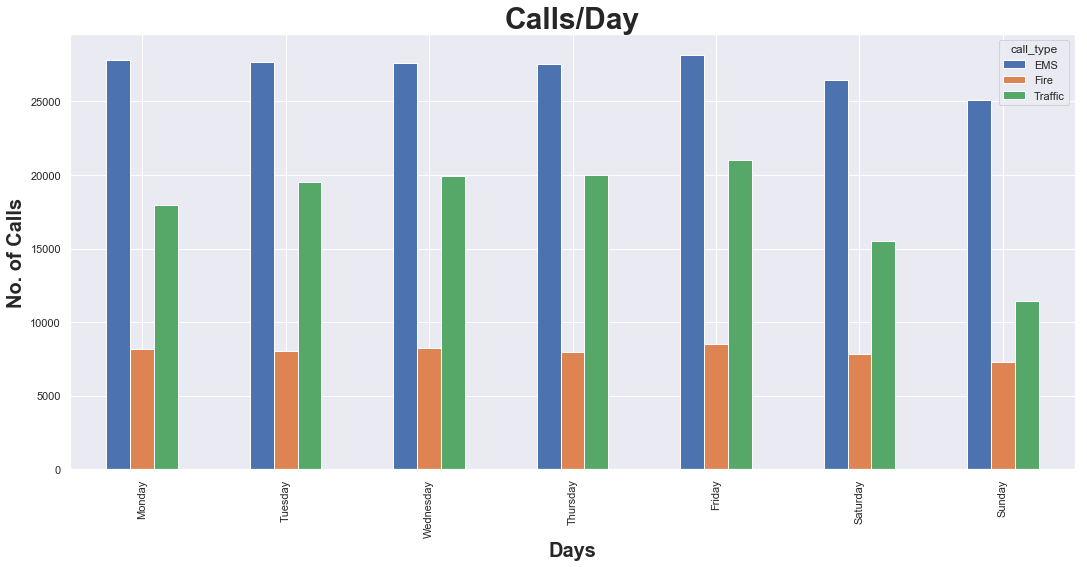

In [60]:
day_data.unstack().plot(kind='bar')
plt.title('Calls/Day',fontdict=font)
plt.xlabel('Days',fontsize = 20,weight='bold')
plt.ylabel('No. of Calls',fontsize = 20,weight='bold')
plt.savefig('Calls_per_day.png',bbox_inches='tight')